In [ ]:
# !pip install geopandas
# !pip install seaborn

In [1]:
import json
# import country_converter as coco
from datetime import datetime, timedelta
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sn
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings('ignore')

In [3]:
# SHAPEFILE = './LE_Modified/output/LE_NoIsl_NoBay_polygon.shp'
SHAPEFILE = 'hydro_p_LakeErie.shp'
# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE) 
geo_df.head(5)

,geometry
0,"POLYGON ((-79.56224 42.85247, -79.55794 42.850..."
1,"POLYGON ((-83.18933 42.09127, -83.17230 42.092..."


In [5]:
geo_df_shape = geo_df[['geometry']]
geo_df_shape.shape

(2, 1)

In [7]:
pred_val = pd.read_csv("df_plot.csv")
req_columns=["year", "Latitude", "Longitude", "pred"]

pred_df = pred_val[req_columns]

print(pred_df.head())

   year   Latitude  Longitude      pred
0  1986  42.709688 -80.281229  0.829539
1  1986  42.627729 -80.269437  0.796531
2  1986  42.774625 -80.098729  0.774245
3  1986  42.729312 -80.252437  0.814893
4  1986  42.773958 -80.125708  0.825836


In [10]:
unique_years = pred_df['year'].unique()

print(unique_years)

year_list = np.arange(start=1990, stop=2020, step=4, dtype=int)

print("year list: ", year_list)

[1986 1987 1988 1990 1991 1992 1993 1994 1995 1996 1997 1998 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019]
year list:  [1990 1994 1998 2002 2006 2010 2014 2018]


In [ ]:
# fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12,12))

# axs = ax.flatten()

# # print(axs)

# for idx, y in enumerate(year_list):

#     df_biomass = pred_df[pred_df["year"]==y]

#     sn.kdeplot(df_biomass['pred'], ax=axs[idx]).set(title=y)

#     # sn.catplot(x="Longitude", y="Latitude", hue= "pred", data=df_biomass, ax=axs[idx]).set(title=y)

#     axs[idx].grid()
    
#     #print(df.head())

#     #print('\n')

# plt.tight_layout()
# plt.show()   

In [12]:
import matplotlib.colors
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","orange", "green"])

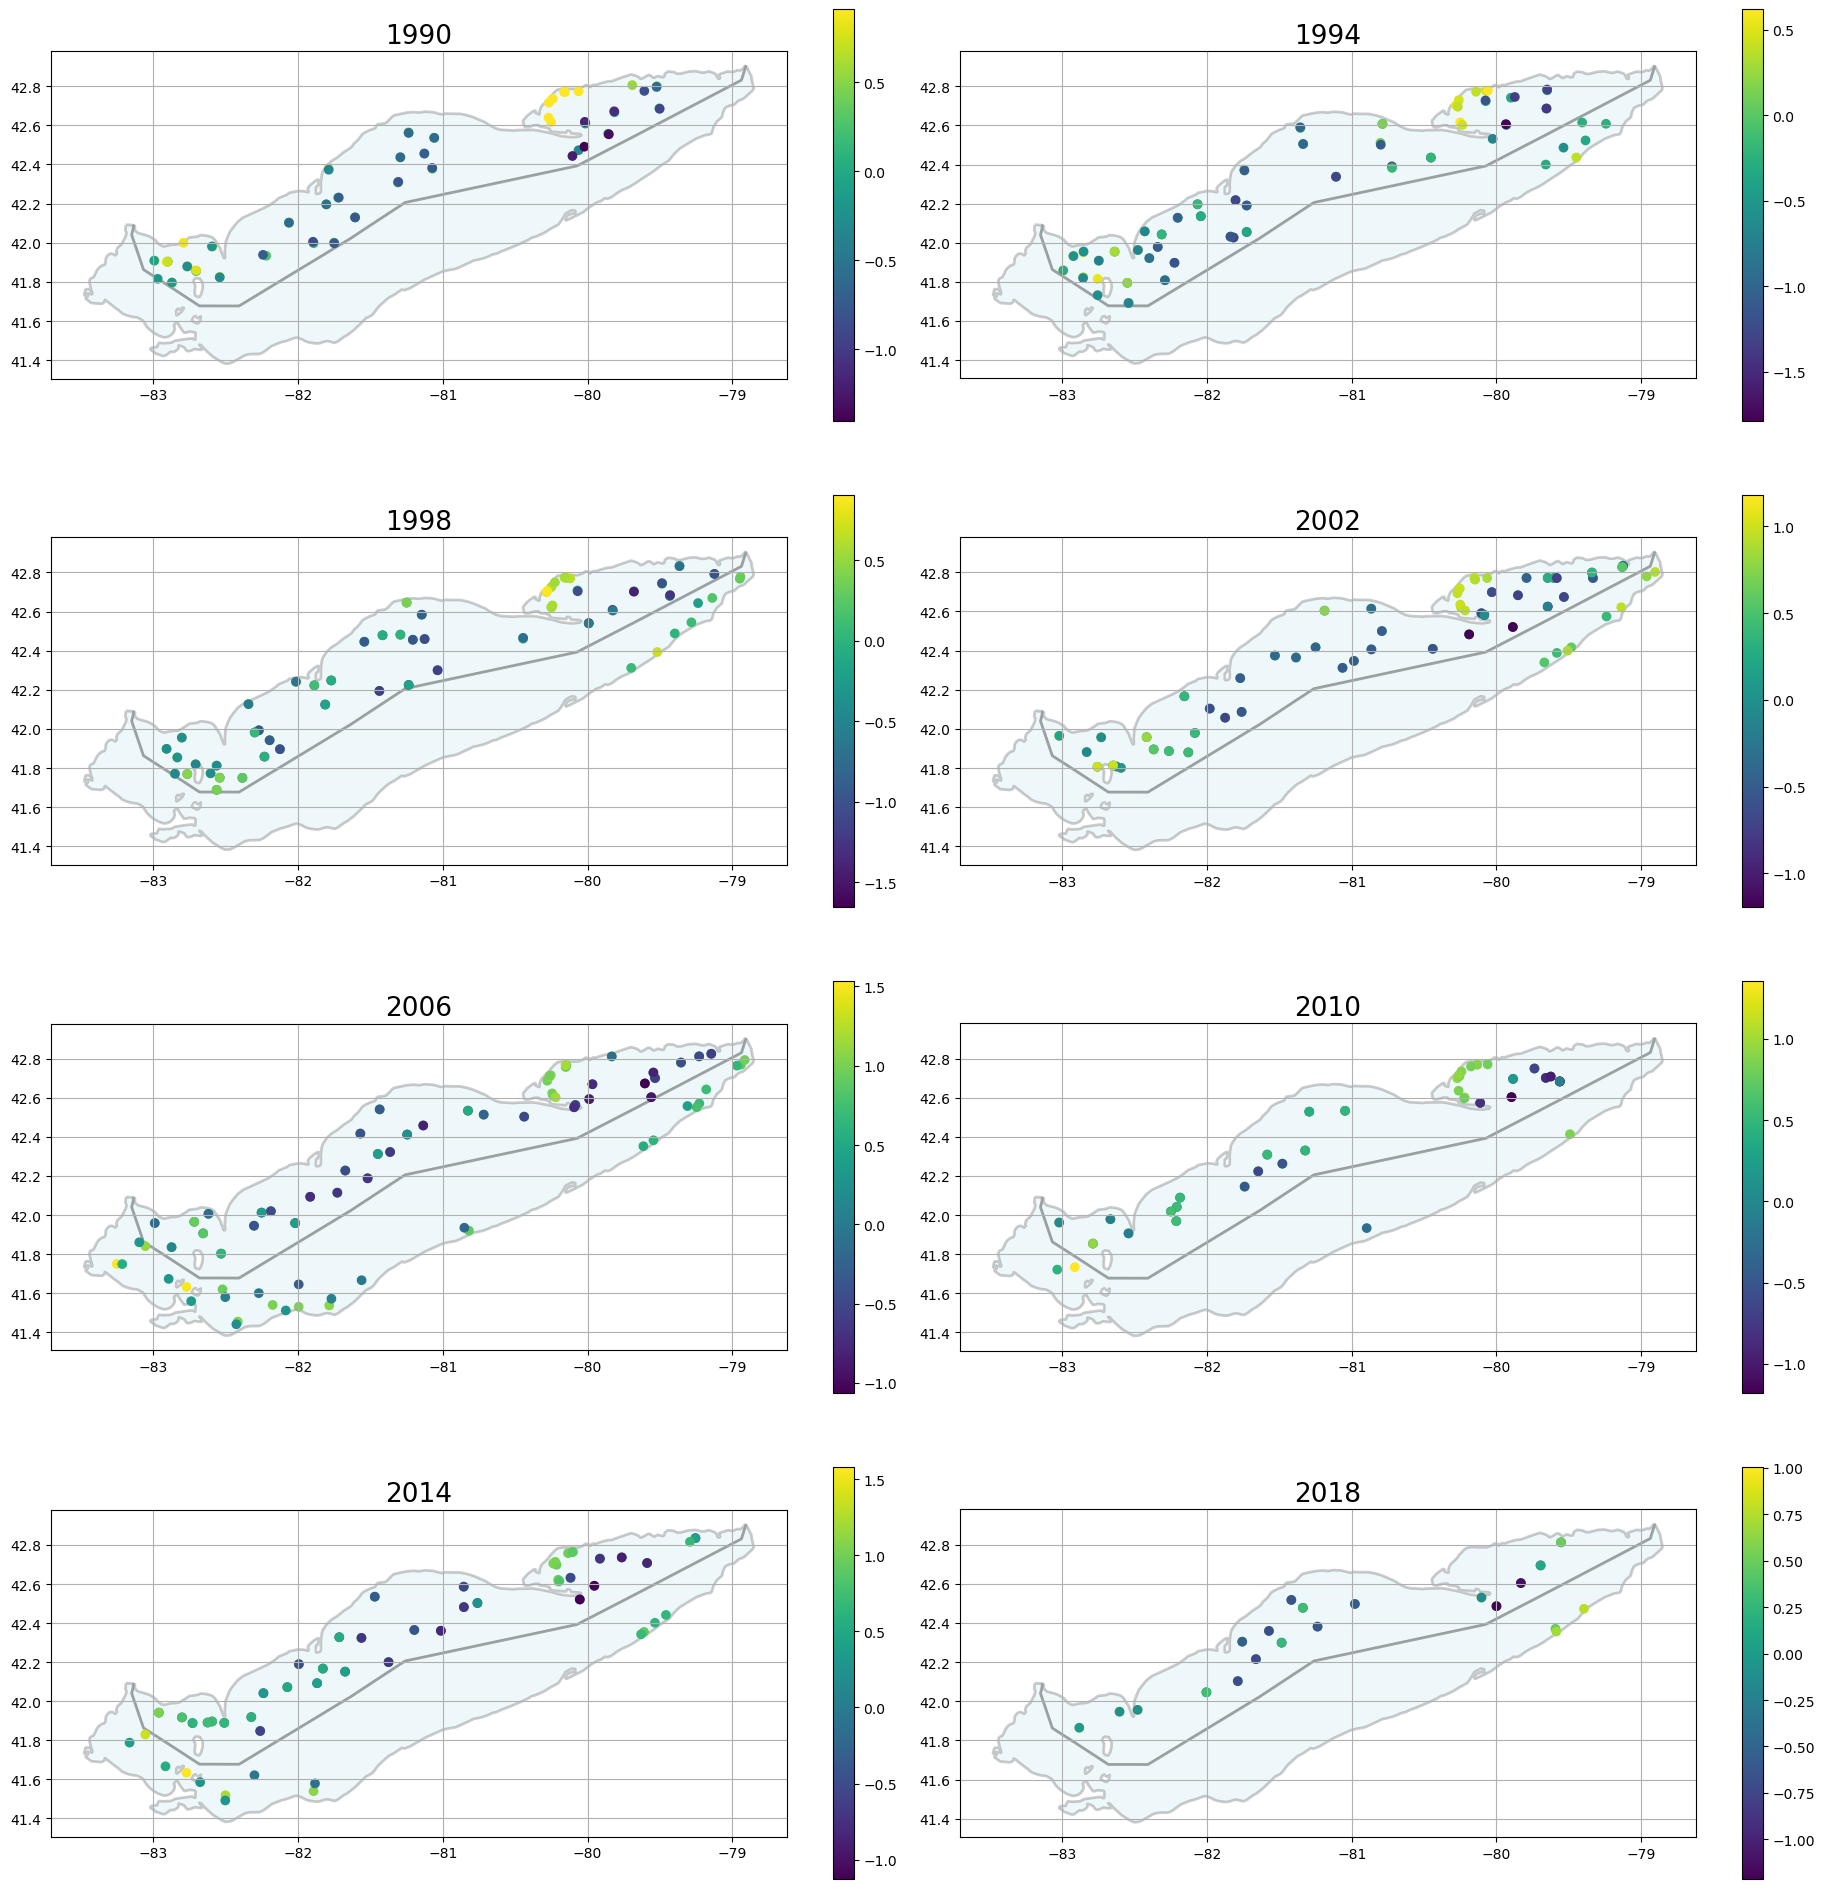

In [14]:
%matplotlib inline
fig1, ax1 = plt.subplots(nrows=4, ncols=2, figsize=(19,19))

fig1.tight_layout(h_pad=0)

axs1 = ax1.flatten()


for idx, y in enumerate(year_list[:]):


    df = pred_df[pred_df["year"]==y]

    crs = {"init":"epsg:4326"}

    geom = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]

    location_df = gpd.GeoDataFrame(df, crs=crs, geometry=geom)
    pred_list = list(df['pred'])
    pred_list_s = np.abs(list(df['pred']))*100
    location_df['marker_size'] = pred_list_s 
    location_df['color'] = [cmap1(c) for c in pred_list]
    # print(location_df.shape)
    # print(location_df.head())
    geo_df_shape.plot(ax=axs1[idx], linewidth=2, facecolor='lightblue', edgecolor='k', alpha=0.2).set(title=y)
    
    location_df.plot(ax=axs1[idx], column="pred", legend=True)
    axs1[idx].set_title(label=str(y), fontsize=19)
    axs1[idx].grid()
plt.tight_layout(h_pad=5)  
plt.show()

In [ ]:
# fig1.savefig("density_plot_16June.jpg")

In [16]:
fig1.savefig("density_plot_16June_v1.png")